In [2]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
# load in the data
df = pd.read_csv('/content/drive/MyDrive/Recommender_Systems/small_rating.csv')

In [4]:
N = df.userId.max() + 1 # number of users
M = df.movie_idx.max() + 1 # number of movies


In [5]:
# split into train and test
df = shuffle(df)
cutoff = int(0.8*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]

In [6]:
# initialize variables
K = 10 # latent dimensionality
mu = df_train.rating.mean()
epochs = 15
# reg = 0.0001 # regularization penalty

In [7]:
# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K)(u) # (N, 1, K)
m_embedding = Embedding(M, K)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

# the neural network
x = Dense(400)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(100)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
x = Dense(1)(x)

In [8]:
model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  # optimizer='adam',
  # optimizer=Adam(lr=0.01),
  optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
r = model.fit(
  x=[df_train.userId.values, df_train.movie_idx.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  batch_size=128,
  validation_data=(
    [df_test.userId.values, df_test.movie_idx.values],
    df_test.rating.values - mu
  )
)

Epoch 1/15
33701/33701 [==============================] - 132s 4ms/step - loss: 0.6729 - mse: 0.6729 - val_loss: 0.6449 - val_mse: 0.6449
Epoch 2/15
33701/33701 [==============================] - 120s 4ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.6206 - val_mse: 0.6206
Epoch 3/15
33701/33701 [==============================] - 127s 4ms/step - loss: 0.6169 - mse: 0.6169 - val_loss: 0.6127 - val_mse: 0.6127
Epoch 4/15
33701/33701 [==============================] - 119s 4ms/step - loss: 0.6041 - mse: 0.6041 - val_loss: 0.5949 - val_mse: 0.5949
Epoch 5/15
33701/33701 [==============================] - 118s 4ms/step - loss: 0.5941 - mse: 0.5941 - val_loss: 0.5957 - val_mse: 0.5957
Epoch 6/15
33701/33701 [==============================] - 127s 4ms/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.5857 - val_mse: 0.5857
Epoch 7/15
33701/33701 [==============================] - 118s 4ms/step - loss: 0.5798 - mse: 0.5798 - val_loss: 0.5820 - val_mse: 0.5820
Epoch 8/15
33701/33701 [==========

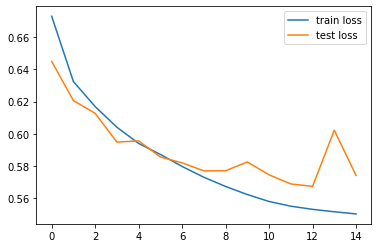

In [10]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()